In [1]:
'''
This code imports numpy packages and allows us to pass data from python to global javascript
objects. It was developed by znah@github
'''

import json
import numpy as np
import numpy.random as rd
from ipywidgets import widgets
from IPython.display import HTML, Javascript, display

def json_numpy_serializer(o):
    if isinstance(o, np.ndarray):
        return o.tolist()
    raise TypeError("{} of type {} is not JSON serializable".format(repr(o), type(o)))

def jsglobal(**params):
    code = [];
    for name, value in params.items():
        jsdata = json.dumps(value, default=json_numpy_serializer)
        code.append("window.{}={};".format(name, jsdata))
    display(Javascript("\n".join(code)))

In [2]:
%%javascript

// Loading the compiled MathBox bundle.
require.config({
    baseUrl:'', paths: {mathBox: '../../tree/static/mathbox/build/mathbox-bundle'}
    // online compilation
    // baseUrl: '', paths: {mathBox: '../static/mathbox/build/mathbox-bundle'}
    // online compilation without local library-- remove baseUrl
    //paths: {mathBox: '//cdn.rawgit.com/unconed/mathbox/eaeb8e15/build/mathbox-bundle'}
});

// Minified graphing functions

window.with_mathbox=function(element,func){require(['mathBox'],function(){var mathbox=mathBox({plugins:['core','controls','cursor','mathbox'],controls:{klass:THREE.OrbitControls},mathbox:{inspect:!1},element:element[0],loop:{start:!1},});var three=mathbox.three;three.renderer.setClearColor(new THREE.Color(0xFFFFFF),1.0);three.camera.position.set(-1,1,2);three.controls.noKeys=!0;three.element.style.height="400px";three.element.style.width="100%";function isInViewport(element){var rect=element.getBoundingClientRect();var html=document.documentElement;var w=window.innerWidth||html.clientWidth;var h=window.innerHeight||html.clientHeight;return rect.top<h&&rect.left<w&&rect.bottom>0&&rect.right>0}
var intervalId=setInterval(function(){if(three.element.offsetParent===null){clearInterval(intervalId);three.destroy();return}
var visible=isInViewport(three.canvas);if(three.Loop.running!=visible){visible?three.Loop.start():three.Loop.stop()}},100);func(mathbox);window.dispatchEvent(new Event('resize'))})};window.plotGraph=function(mathbox,f,xlabel='x',ylabel='y',zlabel='f(x,y)',rng=[[-3,3],[-5,5],[-3,3]]){var view=mathbox.cartesian({range:rng,scale:[1,1,1]},{rotation:(t)=>[0,t*0.02,0]}).grid({axes:[1,3]})
view.area({id:'yaxis',width:1,height:1,axes:[1,3],expr:function(emit,x,y,i,j){emit(4,0,0);emit(0,0,0)},items:2,channels:3,}).text({font:'Helvetica',style:'bold',width:16,height:5,depth:2,expr:function(emit,i,j,k,time){emit(ylabel)},}).label({color:'#000000',snap:!1,outline:2,size:24,offset:[0,-32],depth:.5,zIndex:1});view.vector({points:'#yaxis',color:0x000000,width:9,start:!0});view.area({id:'xaxis',width:1,height:1,axes:[1,3],expr:function(emit,x,y,i,j){emit(0,0,4);emit(0,0,0)},items:2,channels:3,}).text({font:'Helvetica',style:'bold',width:16,height:5,depth:2,expr:function(emit,i,j,k,time){emit(xlabel)},}).label({color:'#000000',snap:!1,outline:2,size:24,offset:[0,-32],depth:.5,zIndex:1,});view.vector({points:'#xaxis',color:0x000000,width:9,start:!0,});view.area({id:'zaxis',width:1,height:1,axes:[1,3],expr:function(emit,x,y,i,j){emit(0,4,0);emit(0,0,0)},items:2,channels:3,}).text({font:'Helvetica',style:'bold',width:16,height:5,depth:2,expr:function(emit,i,j,k,time){emit(zlabel)},}).label({color:'#000000',snap:!1,outline:2,size:24,offset:[0,-32],depth:.5,zIndex:1,});view.vector({points:'#zaxis',color:0x000000,width:9,start:!0,});var graph=view.area({id:'graph',width:64,height:64,axes:[1,3],expr:function(emit,y,x,i,j){emit(y,f(x,y),x)},items:1,channels:3,});view.surface({shaded:!0,lineX:!0,lineY:!0,points:graph,color:0x0000FF,width:1,});return view};window.addSegment=function(view,p0,p1,col){view.array({width:128,expr:function(emit,i,time){var b=i/128;var a=1-b;emit(a*p0[1]+b*p1[1],a*p0[2]+b*p1[2],a*p0[0]+b*p1[0])},channels:3,});view.line({color:col,width:10,size:2.5,stroke:'dotted',start:!1,end:!1,})};window.addPoint=function(view,p,col,label){view.array({width:4,items:2,channels:3,expr:function(emit,i,t){emit(p[1],p[2],p[0])},}).point({color:col,points:'<',size:15,depth:.5,zBias:50,}).text({font:'Helvetica',style:'bold',width:16,height:5,depth:2,expr:function(emit,i,j,k,time){emit(label)},}).label({color:col,snap:!1,outline:2,size:24,offset:[0,-32],depth:.5,zIndex:1,})};window.addCurve=function(view,ab,x,y,z,col){view.array({width:128,expr:function(emit,i,time){var t=(ab[1]-ab[0])*(i/128)+ab[0];emit(y(t),z(t),x(t))},channels:3,});view.line({color:col,width:20,size:2.5,start:!0,end:!0,})};window.addClosedCurve=function(view,ab,x,y,z,col){view.array({width:128,expr:function(emit,i,time){var t=(ab[1]-ab[0])*(i/128)+ab[0];emit(y(t),z(t),x(t))},channels:3,});view.line({color:col,width:20,size:2.5,start:!1,end:!1,})};window.addSurface=function(view,ab,cd,x,y,z,col,opa){view.matrix({width:64,height:64,expr:function(emit,i,j,time){var p=(ab[1]-ab[0])*(i/64)+ab[0];var q=(cd[1]-cd[0])*(j/64)+cd[0];emit(y(p,q),z(p,q),x(p,q))},items:1,channels:3}).surface({shaded:!0,lineX:!1,lineY:!1,color:col,width:1,opacity:opa})}
window.addSequence=function(view,seq,col){var idx=0;var d=new Date();var start=d.getTime();view.array({width:1,expr:function(emit,i,time){var nd=new Date();var now=nd.getTime();if(1000<now-start){idx=idx+1;if(seq.length<=idx){idx=0}
start=now}
emit(seq[idx][1],seq[idx][2],seq[idx][0])},items:1,channels:3}).point({color:col,points:'<',size:15,depth:.5,zBias:50,})}

<IPython.core.display.Javascript object>

# Part V: Necessary and Sufficient Conditions for Optimality


We begin by generalizing the necessary conditions for optimality from 1D. The key is to note that, if ${\bf x}^\ast=(x_1^\ast, x_2^\ast)$ is a solution to $\min f({\bf x})$, then $x_1^\ast$ is a solution to
$$
\min_{x_1} f(x_1, x_2^\ast)
$$
and $x_2^\ast$ is a solution to
$$
\min_{x_2} f(x_1^\ast, x_2). 
$$
Consequently, the necessary conditions for optimality imply that $\partial_1 f({\bf x}^\ast)=\partial_2 f({\bf x}^\ast)=0$, or (in other words) the **gradient of** $f$ **vanishes at** ${\bf x}^\ast$:
$$
\nabla f({\bf x}^\ast) = \begin{pmatrix}
\partial_1 f({\bf x}^\ast)\\
\partial_2 f({\bf x}^\ast)
\end{pmatrix} = \begin{pmatrix}
0\\
0
\end{pmatrix}={\bf 0}.
$$

Now, the **interior** of a set $X\subset\mathbb{R}^2$, denoted $\text{int}(X)$ is the largest open subset of $\mathbb{R}^2$ in $X$. In particular, ${\bf x}\in \text{int}(X)$ if and only if there is an $\varepsilon>0$ such that $B({\bf x}, \varepsilon)\subset X$.

#### Theorem (Necessary Conditions for Optimality): If $X\subset\mathbb{R}^2$, $f\in C^1(X)$, and ${\bf x}^\ast\in\text{int}(X)$ is a minimizer of $f$, then $\nabla f({\bf x}^\ast)={\bf 0}$.

In [3]:
'''
Example: 8*y**2 + (x-2)**2*((x+2)**2+1) + 2
'''

f = lambda x, y: 8*y**2 + (x-2)**2*((x+2)**2+1) + 2

dfy = lambda x, y: 16*y
dfx = lambda x, y: 4*x*(x**2-4) + 2*(x-2)

# Note that dfx is 4*x*(x**2-4)+2*(x-2)=4*x**3 - 14*x - 4
cx = [4, 0, -14, -4]
rootx = np.roots(cx)

# So, the critical points must all have y=0, and x must be in root x. Thus,

for a in rootx:
    print('Value at the critical point (%2.1f, %2.1f) is %2.1f' % (a, 0.0, f(a, 0)))



Value at the critical point (2.0, 0.0) is 2.0
Value at the critical point (-1.7, 0.0) is 16.9
Value at the critical point (-0.3, 0.0) is 22.6


The points where $\nabla f({\bf x})={\bf 0}$ are called **critical points**. There are several important types of critical points.

1. ${\bf x}$ is a **local minimizer** of $f:X\rightarrow\mathbb{R}$ if there is an $\varepsilon>0$ such that $f({\bf x})\leq f({\bf y})$ for all ${\bf y}\in B({\bf x},\varepsilon)\cap X$.
2. ${\bf x}$ is a **local maximizer** of $f:X\rightarrow\mathbb{R}$ if there is an $\varepsilon>0$ such that $f({\bf x})\geq f({bf y})$ for all ${\bf y}\in B({\bf x},\varepsilon)\cap X$
3. ${\bf x}$ is a **global minimizer** of $f:X\rightarrow\mathbb{R}$ if $f({\bf x})\leq f({\bf y})$ for all ${\bf y}\in X$. 
4. ${\bf x}$ is a **global maximizer** of $f:X\rightarrow\mathbb{R}$ if $f({\bf x})\geq f({\bf y})$ for all ${\bf y}\in X$. 

Note that a global minimizer in the interior of a set must also be a local minimizer. Thus, the second derivative test allows us to exclude all local maximizers from our search.

#### Theorem (Second Derivative Test): Let $X\subset\mathbb{R}^2$ and $f\in C^2(X)$. If ${\bf x}^\ast\in \text{int}(X)$ is a global minimizer, then $\nabla^2 f({\bf x}^\ast)$ is positive semidefinite.

With a one more condition on $f$, the necessary conditions also become sufficient conditions.

#### Theorem (Sufficient Conditions for Optimality): If $X\subset\mathbb{R}^2$ is a convex set, $f\in C^1(X)$ is convex on $X$, and ${\bf x}^\ast\in X$ satisfies $\nabla f({\bf x}^\ast)={\bf 0}$, then ${\bf x}^\ast$ is a minimizer of $f$ on $X$.

## Group Questions

1. Explain why $(2,0)$ is the minimizer in the above numerical example.
2. Find the minimizer of the function $f(x, y)=1 + 2x + y + 2x^2 + xy + 2y^2$.
3. Find the minimizer of the function $f(x, y)=(1 - 2x + y)^2 + (2 - x + 2y)^2$.
4. Find the minimizer of the function $f(x, y)=\vert 1-2x +y\vert + \vert 2-x + 2y\vert$.
5. Write out and simplify the necessary conditions for optimality given the function $f(x, y)=e^{-(x-1)^2-(y-1)^2} + e^{-(y-2)^2}$.
6. Write out and simplify the necessary conditions for optimality given the function $f(x, y)=\frac{x^4+y^4+1}{(x-1)^2 + (y-2)^2+1}$.
7. Find the minimizer of the function $f(x, y) = 1 + 2x^2 + y^2 + 2x^4 + x^2y^2 + 2y^4$.
8. Find the minimizer of the function $f(x, y) = (2 + 2x + x^2)(3+y+y^2)$



# Part VI: Equality Constrained Minimization

In 2D, we have enough room to run into a single equality constraint. For example, consider the program
$$
\min 2x^2 + 2xy + 2y^2\text{ subject to } x^2 + y^2 -1 = 0
$$

In [4]:
%%javascript

with_mathbox(element, function(mathbox) {
    
    var fcn = function(x, y) {
        return 2*(x*x + x*y + y*y);
    }
    
    var view = plotGraph(mathbox, fcn);
     
    addClosedCurve(view,
             [0, 6.4],
             function(t){return Math.cos(t);},
             function(t){return Math.sin(t);},
             function(t){return 0;},
             0x3090FF
            );
    
    addClosedCurve(view,
             [0, 6.4],
             function(t){return Math.cos(t);},
             function(t){return Math.sin(t);},
             function(t){return fcn(Math.cos(t), Math.sin(t));},
             0xFF8C00
            );
})

<IPython.core.display.Javascript object>

In 2D, having a single equality constraint means that we can attempt to **eliminate** a variable to reduce the problem to a 1D optimization program. That is, we can use the substitutions $x=\cos(\theta)$ and $y=\sin(\theta)$ to convert the problem to

$$
\min_\theta 2\cos(\theta)^2 + 2\cos(\theta)\sin(\theta)+2\sin(\theta)^2
$$

where the constraint is now implicit. This new 1D program can be solved analytically.

With the goal of higher-dimensional generalizations in mind, let's consider this more abstractly. Set $f(x,y)=2x^2+2xy+2y^2$ and $g(x,y)=x^2+y^2-1$. The constraint $g(x,y)=0$ implied a **parameterization** ${\bf \varphi}(\theta) = (\cos(\theta),\sin(\theta))$ such that

$$
g({\bf \varphi}(\theta)) = 0.
$$

Consequently, we could reduce the program to

$$
\min_{\theta\in[0,2\pi]} f({\bf \varphi}(\theta))).
$$

Necessary conditions for optimality in 1D then implied that

$$
\frac{d (f\circ{\bf \varphi})}{d\theta}(\theta^\ast)=0
$$

for the optimal $\theta$. 

Now, $\frac{d (f\circ{\bf \varphi})}{d\theta}$ obeys a **chain rule** of the form

$$
\frac{d (f\circ{\bf \varphi})}{d\theta}(\theta) = \frac{\partial f}{\partial x}({\bf \varphi}(\theta)) \frac{d\varphi_1}{d\theta}(\theta) + \frac{\partial f}{\partial y}({\bf \varphi}(\theta)) \frac{d\varphi_2}{d\theta}(\theta)
$$

where $\varphi_1(\theta)=\cos(\theta)$ and $\varphi_2(\theta)=\sin(\theta)$. Why is this the case? Well, a rough heuristic is that

$$
\varphi(\theta + \Delta\theta)\approx \varphi(\theta) + \frac{d\varphi}{d\theta}(\theta)\Delta\theta = \begin{pmatrix}
\varphi_1(\theta)\\
\varphi_2(\theta)
\end{pmatrix} + \Delta\theta\begin{pmatrix}
\varphi_1^\prime(\theta)\\
\varphi_2^\prime(\theta)
\end{pmatrix}
$$

for very small $\Delta\theta$. Letting

$$
\varphi^\prime(\theta) = \begin{pmatrix}
\varphi_1^\prime(\theta)\\
\varphi_2^\prime(\theta)
\end{pmatrix},
$$

we have $\varphi(\theta+\Delta\theta)\approx \varphi(\theta) + \Delta\theta\varphi^\prime(\theta)$.

The first order approximation to $f$ at $\varphi(\theta)$ is

$$
f({\bf x}) \approx f(\varphi(\theta)) + \nabla f(\varphi(\theta))^T ({\bf x}-\varphi(\theta)).
$$

Plugging in ${\bf x} = \varphi(\theta) +\Delta\theta \varphi^\prime(\theta)$, we have

$$
f(\varphi(\theta + \Delta\theta))\approx f(\varphi(\theta)+\Delta\theta\varphi^\prime(\theta))\approx f(\varphi(\theta))+\nabla f(\varphi(\theta))^T\varphi^\prime(\theta) \Delta \theta.
$$

This is a first order approximation to $f\circ\varphi$ at $\theta$, and it can be rigorously established that this is **the** first order Taylor approximation to $f\circ\varphi$ at $\theta$. Therefore

$$
(f\circ\varphi)^\prime(\theta) = \nabla f(\varphi(\theta))^T\varphi^\prime(\theta)= \frac{\partial f}{\partial x}({\bf \varphi}(\theta)) \frac{d\varphi_1}{d\theta}(\theta) + \frac{\partial f}{\partial y}({\bf \varphi}(\theta)) \frac{d\varphi_2}{d\theta}(\theta)
$$

The necessary conditions for optimality are then that $\nabla f(\varphi(\theta^\ast))^T\phi^\prime(\theta)=0$, and therefore the gradient $\nabla f(\varphi(\theta^\ast))$ is **orthogonal** or **perpendicular** (${\bf v},{\bf w}\in\mathbb{R}^2$ are orthogonal if ${\bf v}^T{\bf w}=0$) to the tangent $\varphi^\prime(\theta^\ast)$. On the other hand, we know that

$$
g(\varphi(\theta))=0
$$

and hence

$$
0 = \frac{d(g\circ\varphi)}{d\theta}(\theta)=\nabla g(\varphi(\theta))^T\varphi^\prime(\theta))
$$

for all $\theta$. So, we also know that $\varphi^\prime(\theta^\ast)$ is also orthogonal to $\nabla g(\varphi(\theta^\ast))$. Since $\varphi^\prime(\theta^\ast)\not={\bf 0}$, and we are in 2D, it must be the case that $\nabla f(\theta^\ast)$ and $\nabla g(\theta^\ast)$ are parallel, and hence there is a $\lambda\in\mathbb{R}$ such that $\nabla f(\theta^\ast)=\lambda \nabla g(\theta^\ast)$. This reasoning justifies the theory of **Lagrange multipliers**, which provides necessary conditions for constrained optimization in 2D with a single inequality constraint.

#### Theorem (Lagrange Multipliers): If $f,g \in C^1(\mathbb{R}^2)$ and ${\bf x}^\ast$ is a minimizer of $f$ subject to  the constraint $g({\bf x}^\ast)=0$ satisfying $\nabla g({\bf x}^\ast)\not={\bf 0}$, then there exists a $\lambda\in\mathbb{R}$ such that $\nabla f({\bf x}^\ast)=\lambda\nabla g({\bf x}^\ast)$.

Geometrically, we can think of $-\nabla f$ pointing in the direction of greatest local decrease of the function $f$, and the tangent to a parameterization of $g({\bf x})=0$ around a solution must be orthogonal to this, or we could locally decrease the function further. 


## Group Questions

1. Use Lagrange multipliers to solve $\displaystyle \min 2x^2+2xy+2y^2$ subject to $x^2+y^2=1$.
2. Use Lagrange multipliers to solve $\displaystyle \min 2x - y$ subject to $x^2+y^2=1$.
3. Use Lagrange multipliers to solve $\displaystyle \min 2x - y$ subject to $xy=1$.
4. Use Lagrange multipliers to solve $\displaystyle \min 2x^2+2xy+2y^2$ subject to $xy=1$.
5. Find an implicit parameterization of the constraint $x^2 + xy + y^2 + x = 2$ at $(x,y)=(1, -1)$
6. Let $g(x,y)=x^3 + xy + y^2 + x - 2$ and suppose $\gamma:\mathbb{R}\rightarrow\mathbb{R}^2$ satisfies $g\in C^1(\mathbb{R};\mathbb{R}^2)$, $g(\gamma(t))=0$ for all $t\in\mathbb{R}$, and $\gamma(0)=(1, -1)$. Explain why $\gamma^\prime(0)$ is parallel to $(1, 3)$.
7. Find an implicit parameterization of the constraint $x^3 + xy + y^2 + x - 2$ at $(x, y)=(1, -1)$.
8. Find a function $g\in C^1(\mathbb{R}^2)$ such $g(\gamma(t))=0$ for all $t\in\mathbb{R}$, and where $\gamma(t) = (1+\sin(t)+\cos(t) + \cos^2(t), t)$, and $g(x, y)\not = 0$ if there is no $t\in\mathbb{R}$ such that $\gamma(t)=(x,y)$. 

# Part VI: Iterative methods

When the analytic techniques fail, we fall back on iterative methods. The goal is to produce a sequence ${\bf x}^{(0)}, {\bf x}^{(1)}, {\bf x}^{(2)},\ldots$ iteratively by choosing ${\bf x}^{(k+1)}$ so that

1. ${\bf x}^{(k+1)}$ only depends on ${\bf x}^{(0)},{\bf x}^{(1)}, {\bf x}^{(2)},\ldots,{\bf x}^{(k)}$. Ideally, ${\bf x}^{(k+1)}$ only depends on ${\bf x}^{(k)}$.
2. The algorithm uses as few evaluations of $f$, $\nabla f$, or $\nabla^2 f$ as possible.
3. The sequence of iterates ideally satisfies $f({\bf x}^{(0)}) > f({\bf x}^{(1)}) > f({\bf x}^{(2)}) >\cdots$
4. The sequence ${\bf x}^{(0)}, {\bf x}^{(1)}, {\bf x}^{(2)},\ldots$ converges to ${\bf x}^\ast$, which is at least a local minimum of $f$. Moreover, the convergence should not be too slow.

There is already a large amount of room to move in 2D, so iterative procedures generally proceed by considering a sequence of **line searches**. That is, for each iterate ${\bf x}^{(k)}$, we will choose a **search direction** $\Delta{\bf x}^{(k+1)}\in\mathbb{R}^2$, pick a $t^{(k+1)}>0$, and then set

$$
{\bf x}^{(k+1)} = {\bf x}^{(k)} + t^{(k+1)}\Delta{\bf x}^{(k+1)}.
$$

This is called a line search because the set
$$
\{{\bf x}^{(k)} + t\Delta{\bf x}^{(k+1)}\in\mathbb{R}^2:t\in\mathbb{R}\}
$$ 
is a line in $\mathbb{R}^2$. 

How do we choose $\Delta{\bf x}^{(k+1)}$ and $t^{(k+1)}$? We will address the choice of $\Delta{\bf x}^{(k+1)}$ soon, but we note that the choice of $\Delta{\bf x}^{(k+1)}$ suggests that we then choose $t^{(k+1)}$ to approximately solve the 1D optimization program 
$$
\min_{t\in\mathbb{R}} f({\bf x}^{(k)} + t\Delta{\bf x}^{(k+1)}).
$$
Now, one way to do this is to let $t^{(k+1)}$ be a solution to this program. This is the **optimal step size**. In practice this is unnecessary since we will use a lot of evaluations to optimize over a single line when there are an infinite number to ultimately consider. Consequently, we will generally choose $t^{(k+1)}$ by performing **a single step of backtracking**. 

In order to ensure that that $f({\bf x}^{(k+1)})\leq f({\bf x}^{(k)})$ using the step size from backtracking, we must choose $\Delta x^{(k+1)}$ so that the Armijo condition is eventually satisfied. That is, there needs to be an $N$ such that
$$
f({\bf x}^{(k)} + \beta^n\Delta{\bf x}^{(k+1)})\leq f({\bf x}^{(k)}) + \alpha\beta^n\nabla f({\bf x}^{(k)})^T\Delta{\bf x}^{(k+1)}< f({\bf x}^{(k)})
$$
for all $n\geq N$, and where $\alpha,\beta\in(0,1)$ are the backtracking parameters.

In 1D, we showed that the steepest descent $\Delta x^{(k+1)}=-f^\prime(x^{(k)})$ satisfied this property. The generalization of this to 2D is **gradient descent**:
$$
\Delta {\bf x}^{(k+1)} = -\nabla f({\bf x}^{(k)}).
$$
One good reason for this choice is that, for any $t>0$, the solution to
$$
\min_{\Delta {\bf x}\in\mathbb{R}^2} f({\bf x}^{(0)}) + t\nabla f({\bf x}^{(0)})^T\Delta{\bf x}\text{ subject to }\Vert\Delta {\bf x}\Vert=1
$$
is given by $\Delta{\bf x}^\ast = -\frac{1}{\Vert \nabla f({\bf x}^{(0)})\Vert} \nabla f({\bf x}^{(0)})$. Since $f({\bf x}^{(0)}) + t\nabla f({\bf x}^{(0)})^T\Delta{\bf x}$ is the first order approximation to $f({\bf x}^{(0)}+t\Delta{\bf x})$, we conclude that $-\nabla f({\bf x}^{(0)})$ points in the direction of the largest local decrease at ${\bf x}^{(0)}$.

Let's see an example of backtracking using steepest descent directions.

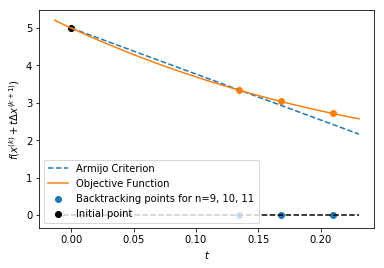

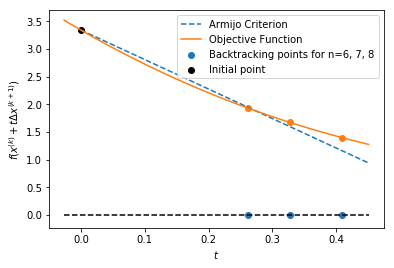

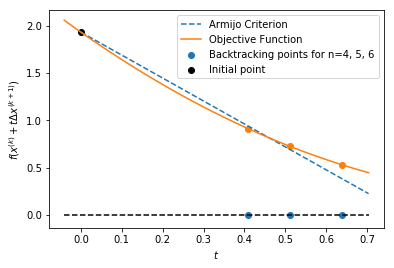

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
import matplotlib.pyplot as plt

def backtracking(x0, dx, f, df0, alpha=0.2, beta=0.8, verbose=False):
    '''
    Backtracking for general functions with illustrations
    :param x0: Previous point from backtracking, or initial guess
    :param dx: Incremental factor for updating x0
    :param f: Objective function
    :param df0: Gradient of f at x0
    :param alpha: Sloping factor of stopping criterion
    :param beta: "Agressiveness" parameter for backtracking steps
    :param verbose: Boolean for providing plots and data
    :return: x1, the next iterate in backtracking
    '''

    # Note that the definition below requires that dx and df0 have the same shape
    delta = alpha * np.sum(dx * df0) # A general, but memory intensive inner product
    
    t = 1 # Initialize t=beta^0
    f0 = f(x0) # Evaluate for future use
    x = x0 + dx # Initialize x_{0, inner}
    fx = f(x)
    
    if verbose:
        n=0
        xs = [x]
        fs = [fx]
        ts = [1] * 3
    
    while (not np.isfinite(fx)) or f0 + delta * t < fx:
        t = beta * t
        x = x0 + t * dx
        fx = f(x)
    ###################################### 
    
        if verbose:
            n += 1
            xs.append(x)
            fs.append(fx)
            ts.append(t)
            ts.pop(0)
            
    if verbose:
        # Display the function along the line search direction as a function of t
        s = np.linspace(-0.1*ts[-1], 1.1*ts[0], 100)
        xi = [0, 1.1*ts[0]]
        fxi = [f0, f0 + 1.1*ts[0]*delta]   
        y = np.zeros(len(s))
        
        for i in range(len(s)):
            y[i] = f(x0 + s[i]*dx) # Slow for vectorized functions

        plt.figure('Backtracking illustration')
        arm, =plt.plot(xi, fxi, '--', label='Armijo Criterion')
        fcn, =plt.plot(s, y, label='Objective Function')
        plt.plot([s[0], s[-1]], [0, 0], 'k--')
        pts =plt.scatter(ts, [0 for p in ts], label='Backtracking points for n=%d, %d, %d' % (n, n+1, n+2))
        plt.scatter(ts, [f(x0 + q*dx) for q in ts] , label='Backtracking values for n=%d, %d, %d' % (n, n+1, n+2))
        init =plt.scatter([0], [f0], color='black', label='Initial point')
        plt.xlabel('$t$')
        plt.ylabel('$f(x^{(k)}+t\Delta x^{(k+1)})$')
        plt.legend(handles=[arm, fcn, pts, init])
        plt.show()
        
        return x, xs, fs
    
    else:
        return x
    
def procPointValue(p, f):
    x = []
    y = []
    z = []
    for i in range(len(f)):
        x.append(p[i][0])
        y.append(p[i][1])
        z.append(f[i])
    
    return np.vstack([x, y, z]).T
        

fun = lambda x: (2 + 8*x[1]*x[1] + (x[0]-2)**2 * ((x[0]+2)**2+1))/20
dfun = lambda x: np.array([((x[0]-2)*((x[0]+2)**2+1) + (x[0]-2)**2 * (x[0]+2)) / 10, 4*x[1]/5])

x0 = np.array([3, 3])
dx = -dfun(x0)

alpha = 0.8
beta = 0.8

x1, xs1, fs1 = backtracking(x0, dx, fun, dfun(x0), alpha=alpha, beta=beta, verbose=True)
x2, xs2, fs2 = backtracking(x1, -dfun(x1), fun, dfun(x1), alpha=alpha, beta=beta, verbose=True)
x3, xs3, fs3 = backtracking(x2, -dfun(x2), fun, dfun(x2), alpha=alpha, beta=beta, verbose=True)

bt1 = procPointValue(xs1, fs1)
bt1pts = procPointValue(xs1, [0]*len(fs1))
jsglobal(BT1=bt1)
jsglobal(BT1PTS=bt1pts)

bt2 = procPointValue(xs2, fs2)
bt2pts = procPointValue(xs2, [0]*len(fs2))
jsglobal(BT2=bt2)
jsglobal(BT2PTS=bt2pts)

bt3 = procPointValue(xs3, fs3)
bt3pts = procPointValue(xs3, [0]*len(fs3))
jsglobal(BT3=bt3)
jsglobal(BT3PTS=bt3pts)

In [6]:
%%javascript

with_mathbox(element, function(mathbox) {
    
    var fcn = function(x, y) {
        return (2 + 8*y*y + Math.pow(x-2,2)*(Math.pow(x+2,2)+1))/20;
    }
    
    var dfcnx = function(x, y) {
        return ((x-2)*(Math.pow(x+2,2)+1) + Math.pow(x-2,2)*(x+2))/10;
    }
    
    var dfcny = function(x, y) {
        return 4*y/5;
    }
    
    var pt = [3, 3];
    var f0 = fcn(pt[0], pt[1]);
    var dx = [-dfcnx(pt[0], pt[1]), -dfcny(pt[0], pt[1])];
    var delta = -0.8 * (dx[0]*dx[0] + dx[1]*dx[1]);
    
    var view = plotGraph(mathbox, fcn);
    addPoint(view, [3, 3, 0], 0x3090FF, '(3,3)');
    addPoint(view, [3, 3, 5], 0xFF9030, '(3,3,5)');
    addSequence(view, BT1PTS, 0x000000);
    addSequence(view, BT1, 0xFF8C00);
    addSegment(view, [pt[0], pt[1], 0], [pt[0]+dx[0], pt[1]+dx[1], 0], 0x00000);
    addSegment(view, [pt[0], pt[1], f0], [pt[0]+dx[0], pt[1]+dx[1], f0 + delta], 0xFF8C00);
    addCurve(view,
             [-0.1, 2.1],
             function(t){return pt[0] + t*dx[0];},
             function(t){return pt[1] + t*dx[1];},
             function(t){return fcn(pt[0] + t*dx[0], pt[1] + t*dx[1]);},
             0xFF4500
            );
    
    
})


<IPython.core.display.Javascript object>

In [7]:
%%javascript

with_mathbox(element, function(mathbox) {
    
    var fcn = function(x, y) {
        return (2 + 8*y*y + Math.pow(x-2,2)*(Math.pow(x+2,2)+1))/20;
    }
    
    var dfcnx = function(x, y) {
        return ((x-2)*(Math.pow(x+2,2)+1) + Math.pow(x-2,2)*(x+2))/10;
    }
    
    var dfcny = function(x, y) {
        return 4*y/5;
    }
    
    var pt = [BT1PTS[BT1PTS.length-1][0], BT1PTS[BT1PTS.length-1][1]];
    var f0 = fcn(pt[0], pt[1]);
    var dx = [-dfcnx(pt[0], pt[1]), -dfcny(pt[0], pt[1])];
    var delta = -0.8 * (dx[0]*dx[0] + dx[1]*dx[1]);
    
    var view = plotGraph(mathbox, fcn);
    addPoint(view, [pt[0], pt[1], 0], 0x3090FF, '(' + pt[0].toFixed(2) + ',' + pt[1].toFixed(2) + ')');
    addPoint(view, [pt[0], pt[1], f0], 0xFF9030, '(' + pt[0].toFixed(2) + ',' + pt[1].toFixed(2) + ',' + f0.toFixed(2) + ')');
    addSequence(view, BT2PTS, 0x000000);
    addSequence(view, BT2, 0xFF8C00);
    addSegment(view, [pt[0], pt[1], 0], [pt[0]+dx[0], pt[1]+dx[1], 0], 0x00000);
    addSegment(view, [pt[0], pt[1], f0], [pt[0]+dx[0], pt[1]+dx[1], f0 + delta], 0xFF8C00);
    addCurve(view,
             [-0.1, 2.1],
             function(t){return pt[0] + t*dx[0];},
             function(t){return pt[1] + t*dx[1];},
             function(t){return fcn(pt[0] + t*dx[0], pt[1] + t*dx[1]);},
             0xFF4500
            );
    
    
})


<IPython.core.display.Javascript object>

In [8]:
%%javascript

with_mathbox(element, function(mathbox) {
    
    var fcn = function(x, y) {
        return (2 + 8*y*y + Math.pow(x-2,2)*(Math.pow(x+2,2)+1))/20;
    }
    
    var dfcnx = function(x, y) {
        return ((x-2)*(Math.pow(x+2,2)+1) + Math.pow(x-2,2)*(x+2))/10;
    }
    
    var dfcny = function(x, y) {
        return 4*y/5;
    }
    
    var pt = [BT2PTS[BT2PTS.length-1][0], BT2PTS[BT2PTS.length-1][1]];
    var f0 = fcn(pt[0], pt[1]);
    var dx = [-dfcnx(pt[0], pt[1]), -dfcny(pt[0], pt[1])];
    var delta = -0.8 * (dx[0]*dx[0] + dx[1]*dx[1]);
    
    var view = plotGraph(mathbox, fcn);
    addPoint(view, [pt[0], pt[1], 0], 0x3090FF, '(' + pt[0].toFixed(2) + ',' + pt[1].toFixed(2) + ')');
    addPoint(view, [pt[0], pt[1], f0], 0xFF9030, '(' + pt[0].toFixed(2) + ',' + pt[1].toFixed(2) + ',' + f0.toFixed(2) + ')');
    addSequence(view, BT3PTS, 0x000000);
    addSequence(view, BT3, 0xFF8C00);
    addSegment(view, [pt[0], pt[1], 0], [pt[0]+dx[0], pt[1]+dx[1], 0], 0x00000);
    addSegment(view, [pt[0], pt[1], f0], [pt[0]+dx[0], pt[1]+dx[1], f0 + delta], 0xFF8C00);
    addCurve(view,
             [-0.1, 2.1],
             function(t){return pt[0] + t*dx[0];},
             function(t){return pt[1] + t*dx[1];},
             function(t){return fcn(pt[0] + t*dx[0], pt[1] + t*dx[1]);},
             0xFF4500
            );
    
    
})

<IPython.core.display.Javascript object>

Alternatively, we can also use a constant step size for gradient descent. This approximates a continuous **gradient flow**. Now, our previous approximation theory required a bound on $f^{\prime\prime}$, but the analgous $\nabla^2 f$ is a matrix. To obtain a similar theory, we introduce the **spectral norm** or **operator norm** of a 2 by 2 matrix $A$:
$$
\Vert A \Vert = \min_{\Vert {\bf u}\Vert=1} \Vert A u\Vert.
$$

We have the following convergence rate guarantee, which is the same as in the 1D case:

#### Theorem: Suppose $f\in C^2(\mathbb{R}^2)$ is convex and also that there is an $M>0$ such that $ \Vert \nabla^2 f({\bf x})\Vert\leq M$ for all ${\bf x}\in\mathbb{R}^2$. If ${\bf x}^{(0)}\in\mathbb{R}$ and ${\bf x}^{(k)}$ are the iterates obtained from successively applying backtracking with gradient descent, then there is a constant $C>0$ such that
$$
f({\bf x}^{(k)})-f({\bf x}^\ast) \leq \frac{C}{k}
$$

In [9]:
%%javascript 

with_mathbox(element, function(mathbox) {
    
    var fcn = function(x, y) {
        return (2 + 8*y*y + Math.pow(x-2,2)*(Math.pow(x+2,2)+1))/20;
    }
    
    var dfcnx = function(x, y) {
        return ((x-2)*(Math.pow(x+2,2)+1) + Math.pow(x-2,2)*(x+2))/10;
    }
    
    var dfcny = function(x, y) {
        return 4*y/5;
    }
    
    var d = new Date();
    var start = d.getTime();
    var xk = -3*(2*Math.random()-1);
    var yk = 3;
    var step = 0.01

    var view = plotGraph(mathbox, fcn);
    
    view.area({
      id: 'gradient flow',
      width: 16,
      height: 16,
      axes: [1, 3],
      expr: function (emit, x, y, i, j) {
          emit(y-0.1*dfcny(x, y),0,x-0.1*dfcnx(x, y)); // End of Arrow
          emit(y,0,x); // Beginning of Arrow
      },
      items: 2,
      channels: 3,
    }).vector({
      color: 0x00FF00,
      width: 5,
      start: true,
    });

    
    view.array({width: 4,
                items: 2,
                channels: 3,
                expr: function (emit, i, t) {
                    var di = new Date();
                    var now = di.getTime();
                    if (di - start < 6000) {
                        var grad = [dfcnx(xk, yk), dfcny(xk, yk)];
                        xk = xk - step * grad[0];
                        yk = yk - step * grad[1];
                    } else {
                        d = new Date();
                        start = d.getTime();
                        xk = -3*(2*Math.random()-1);
                        yk = 3;
                    }
                    emit(yk,0,xk);
                },
               })
        .point({color:  0x3090FF,
                points: '<',
                size: 15,
                depth: .5,
                zBias: 50
               })
        .text({font: 'Helvetica',
               style: 'bold',
               width:  16,
               height: 5,
               depth:  2,
               expr: function (emit, i, j, k, time) {
                   emit('(x(k), y(k))');
               },
              })
        .label({color: 0x3090FF,
                snap: false,
                outline: 2,
                size: 24,
                offset: [0, -32],
                depth: .5,
                zIndex: 1,
               });
    
    view.array({width: 4,
                items: 2,
                channels: 3,
                expr: function (emit, i, t) {
                    emit(yk, fcn(xk,yk), xk);
                },
               })
        .point({color:  0xFF9030,
                points: '<',
                size: 15,
                depth: .5,
                zBias: 50
               })
        .text({font: 'Helvetica',
               style: 'bold',
               width:  16,
               height: 5,
               depth:  2,
               expr: function (emit, i, j, k, time) {
                   emit('(x(k), y(k), f(x(k), y(k)))');
               },
              })
        .label({color: 0xFF9030,
                snap: false,
                outline: 2,
                size: 24,
                offset: [0, -32],
                depth: .5,
                zIndex: 1,
               });
    
    
})

<IPython.core.display.Javascript object>

Using accelerated backtracking, we also have a nearly optimal rate of convergence:

#### Theorem: Suppose $f\in C^2(\mathbb{R}^2)$ is convex and also that there is an $M>0$ such that $\Vert \nabla^2 f({\bf x})\Vert\leq M$ for all $x\in\mathbb{R}$. Then, for the sequence ${\bf x}^{(1)}, {\bf x}^{(2)}, {\bf x}^{(3)},\ldots$ produced by accelerated backtracking with gradient descent directions, there is a constant $C>0$ such that
$$
f({\bf x}^{(k)})-f({\bf x}^\ast) \leq \frac{C}{k^2}.
$$

Finally, for sufficiently structured programs we can ensure linear convergence of the iterates to a solution.

#### Theorem (Linear Convergence of Gradient Descent): Suppose $f\in C^2(\mathbb{R}^2)$, $\nabla f({\bf x}^\ast)=0$, and there is a constant $c>0$ such that ${\bf u}^T\nabla f(x){\bf u}\geq c$ for all ${\bf x},{\bf u}\in\mathbb{R}^2$ with $\Vert {\bf u}\Vert=1$. Then there is a $\gamma\in(0,1)$ such that gradient descent iterates initialized with any ${\bf x}^{(0)}$ satisfy  $\Vert {\bf x}^{(k+1)} - {\bf x}^\ast\Vert \leq \gamma \Vert {\bf x}^{(k)}-{\bf x}^\ast\Vert^2$ for all $k\geq 0$. 

## Newton Search Directions

The generalization of the Newton's direction in $\mathbb{R}^2$ is

$$
\Delta {\bf x}^{(k+1)} = -\left(\nabla^2 f({\bf x}^{(k)})\right)^{-1} \nabla f({\bf x}^{(k)}) 
$$

where

$$
\begin{pmatrix}
a & b \\
c & d
\end{pmatrix}^{-1} = \frac{1}{ad-bc} \begin{pmatrix}
d & -b\\
-c & a
\end{pmatrix}
$$

is the **inverse matrix** for any matrix with non-zero determinant. This formula is derived by finding the critical point of the second order Taylor approximation at ${\bf x}^{(k)}$. The gradient of

$$
p({\bf x}) = f({\bf x})^{(k)}) + \nabla f({\bf x})^{(k)})^T({\bf x}-{\bf x}^{(k)}) + \frac{1}{2}({\bf x}-{\bf x}^{(k)})^T\nabla^2 f({\bf x})^{(k)})({\bf x}-{\bf x}^{(k)})
$$
is
$$
\nabla p({\bf x}) = \nabla f({\bf x}^{(k)}) + \nabla^2 f({\bf x}^{(k)})({\bf x}-{\bf x}^{(k)}).
$$
Setting the above to ${\bf 0}$ and assuming that $\nabla^2f({\bf x}^{(k)})$ is invertible, we then have
$$
{\bf x}^{(k+1)}={\bf x}^{(k)} - \left(\nabla^2 f({\bf x}^{(k)})\right)^{-1}\nabla f({\bf x}^{(k)}).
$$

#### Theorem (Quadratic Convergence of Newton's Method): Suppose $f\in C^3(\mathbb{R}^2)$, $\nabla f({\bf x}^\ast)=0$, there is a constant $c>0$ such that ${\bf u}^T\nabla f(x){\bf u}\geq c$ for all ${\bf x},{\bf u}\in\mathbb{R}^2$ with $\Vert {\bf u}\Vert=1$, and there is a constant $K>0$ such that $\vert \partial_{i, j, k}f(x)\vert \leq K$ for all $x\in\mathbb{R}$ and all $i, j, k\in\{1, 2\}$. If ${\bf x}^{(0)}$ satisfies $\Vert {\bf x}^{(0)}-{\bf x}^\ast\vert\leq \frac{2c}{3k}$, then the Newton iterates initialized with ${\bf x}^{(0)}$ satisfy $\Vert {\bf x}^{(k)}-{\bf x}^\ast\Vert\leq \frac{2c}{3K}$ and $\Vert {\bf x}^{(k+1)} - {\bf x}^\ast\Vert \leq \frac{3K}{2c} \Vert {\bf x}^{(k)}-{\bf x}^\ast\Vert^2$ for all $k\geq 0$. 

The **quadratic convergence** here is also known as **doubly exponential convergence** since it implies 
$$
\Vert {\bf x}^{(k)}-{\bf x}^\ast\Vert \leq \gamma^{2^k-1}\Vert {\bf x}^{(0)}-{\bf x}^\ast\Vert
$$
for some $\gamma\in(0,1)$. However, convergence in this theorem is contingent on the fact that $\Vert {\bf x}^{(0)}-{\bf x}^\ast\Vert < \frac{2c}{3K}$.

In [10]:
%%javascript 

with_mathbox(element, function(mathbox) {
    
    var fcn = function(x, y) {
        return (2 + 8*y*y + Math.pow(x-2,2)*(Math.pow(x+2,2)+1))/20;
    };
    
    var dfcnx = function(x, y) {
        return ((x-2)*(Math.pow(x+2,2)+1) + Math.pow(x-2,2)*(x+2))/10;
    };
    
    var dfcny = function(x, y) {
        return 4*y/5;
    };
    
    var d2fcn = function(x, y) {
        return [[(Math.pow(x+2,2) + 1 + 4*(x*x-1) + Math.pow(x-2,2))/10,0], [0, 0.8]];
    };
    
    var nStep = function(x, y) {
        var H11=(Math.pow(x+2,2) + 1 + 4*(x*x-1) + Math.pow(x-2,2))/10;
        var H22=0.8;
        return [dfcnx(x,y)/H11, dfcny(x,y)/H22];
    };
    
    var d = new Date();
    var start = d.getTime();
    var xk = -3*(2*Math.random()-1);
    var yk = 3;
    var step = 0.01

    var view = plotGraph(mathbox, fcn);
    
    view.area({
      id: 'Newton flow',
      width: 16,
      height: 16,
      axes: [1, 3],
      expr: function (emit, x, y, i, j) {
          var nstep=nStep(x, y);
          emit(y-0.1*nstep[1], 0, x-0.1*nstep[0]); // End of Arrow
          emit(y, 0, x); // Beginning of Arrow
      },
      items: 2,
      channels: 3,
    }).vector({
      color: 0x00FF00,
      width: 5,
      start: true,
    });

    
    view.array({width: 4,
                items: 2,
                channels: 3,
                expr: function (emit, i, t) {
                    var di = new Date();
                    var now = di.getTime();
                    if (di - start < 6000) {
                        var nstep = nStep(xk, yk);
                        xk = xk - step * nstep[0];
                        yk = yk - step * nstep[1];
                    } else {
                        d = new Date();
                        start = d.getTime();
                        xk = -3*(2*Math.random()-1);
                        yk = 3;
                    }
                    emit(yk, 0, xk);
                },
               })
        .point({color:  0x3090FF,
                points: '<',
                size: 15,
                depth: .5,
                zBias: 50
               })
        .text({font: 'Helvetica',
               style: 'bold',
               width:  16,
               height: 5,
               depth:  2,
               expr: function (emit, i, j, k, time) {
                   emit('(x(k), y(k))');
               },
              })
        .label({color: 0x3090FF,
                snap: false,
                outline: 2,
                size: 24,
                offset: [0, -32],
                depth: .5,
                zIndex: 1,
               });
    
    view.array({width: 4,
                items: 2,
                channels: 3,
                expr: function (emit, i, t) {
                    emit(yk, fcn(xk,yk), xk);
                },
               })
        .point({color:  0xFF9030,
                points: '<',
                size: 15,
                depth: .5,
                zBias: 50
               })
        .text({font: 'Helvetica',
               style: 'bold',
               width:  16,
               height: 5,
               depth:  2,
               expr: function (emit, i, j, k, time) {
                   emit('(x(k), y(k), f(x(k), y(k)))');
               },
              })
        .label({color: 0xFF9030,
                snap: false,
                outline: 2,
                size: 24,
                offset: [0, -32],
                depth: .5,
                zIndex: 1,
               });
    
    
})

<IPython.core.display.Javascript object>